In [103]:
import os
import sys
import requests
import json
import operator
import time
import datetime
import nltk
import matplotlib
import matplotlib.pyplot as pyplot

if not os.path.exists('..\\output'):
    os.makedirs('..\\output')
    
print(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))
time.sleep(1)
print('_______________________________________________')
print("Python Version: "+sys.version)
print("Requests Version: "+requests.__version__)
print("Json Version: "+json.__version__)

2018-10-12 16:42:12
_______________________________________________
Python Version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Requests Version: 2.18.4
Json Version: 2.0.9


In [73]:
from nltk import ngrams, FreqDist

In [3]:
def writeText(text, path, mode = 'a'):
    with open (path, mode) as textout:
        textout.write((text))
        
def writeJson(json, path, mode = 'w'):
    with open(path, mode) as file:
        file.write(json.dumps(json))
        
def writeCsv(listOut, outputFile):
    import csv
    with open (outputFile, "w", newline='', encoding = 'ANSI') as outputfile:
        writer = csv.writer(outputfile, delimiter = ",")
        for element in listOut:
            writer.writerow(element)

In [4]:
def getToken():
    return open('..\\token\\token.txt', 'r').read()

In [5]:
def getJsonDocs(page = 1, itemsperpage = 200):
    jsondata ='dummy'
    list_return = []

    while jsondata:
        try:
            r = requests.get("https://app.23degrees.io/services/pub/api/v1/opendata/getWorldBankDataSetsPaginated/"+str(page)+"/"+str(itemsperpage)
                         ,timeout=None
                         ,headers={  'Content-Type': 'application/json'
                                    , 'Authorization' : 'Bearer '+ getToken()
                                   }
                        )    
            jsondata = r.json()
            for elem in jsondata:
                list_return.append(elem)
        except requests.exceptions.HTTPError as err:
            print(err)
        page += 1
    return list_return

In [6]:
list_js_docs = getJsonDocs(1,200)

In [21]:
list_js_docs[2]

{'_id': '5b9a454e65d715001bce2645',
 'description': 'Public expenditure on health from domestic sources per capita expressed in current US dollars.',
 'name': 'Domestic general government health expenditure per capita (current US$), countries grouped by income levels',
 'slug': 'domestic-general-government-health-expenditure-per-capita-current-ususd-countries-grouped-by-income-levels',
 'typeSpecific': {'amountVizzes': 6,
  'data': {'flowData': {'isFlowData': False},
   'publisher': {'identifier': 'twentythree',
    'license': 'https://datacatalog.worldbank.org/public-licenses',
    'name': 'The World Bank',
    'url': 'http://www.worldbank.org/'},
   'type': 'json'},
  'dataId': '5b9a454d3a52b4001919584d',
  'fields': {'countryid': {'dataType': 'string',
    'fieldName': 'countryid',
    'fieldType': 'miscField',
    'format': {'date': {'dateFormat': 'YYYY', 'inputFormat': 'YYYY'},
     'locale': 'de-DE',
     'number': {'decimalPlaces': '2',
      'digitGrouping': True,
      'number

In [66]:
list_list_js_tags = [] #Format: jsondoc(str)|name(str)|description(str)|tags(list)
list_js_tags_inner = []
list_js_notags = []
list_unique_tags = []
list_tags = []
dict_tags = {}
for i, jsondoc in enumerate(list_js_docs):
    jstmp = json.dumps(jsondoc, sort_keys=True,indent=4, separators=(',', ': '))
    if 'tags' in jstmp:
        list_js_tags_inner = []
        list_js_tags_inner.append(jstmp)
        tmp_list_tags = []
        for tag in jsondoc['typeSpecific']['context']['tags']:
            tmp_list_tags.append(tag)
            list_tags.append(tag)
            if tag not in list_unique_tags:
                list_unique_tags.append(tag)
                dict_tags[tag] = 1
            else:
                dict_tags[tag] += 1
        list_js_tags_inner.append(jsondoc['name'])
        list_js_tags_inner.append(jsondoc['description'])
        list_js_tags_inner.append(tmp_list_tags)
        list_list_js_tags.append(list_js_tags_inner)
                
    else:
        list_js_notags.append(jstmp)

list_tags_sorted = list(sorted(dict_tags.items(), key=lambda x: x[1], reverse = True))

In [64]:
print('Json-Files: ', len(list_js_docs))
print('Json-Files with tags: ', len(list_list_js_tags))
print('Json-Files without tags: ', len(list_js_notags))
print('Unique tags: ', len(list_tags_sorted))

Json-Files:  4580
Json-Files with tags:  3573
Json-Files without tags:  1007
Unique tags:  2848


In [65]:
ll_name_desc_tags = []
for elem in list_list_js_tags:
    list_inner = []
    list_inner.append(elem[1])
    list_inner.append(elem[2])
    list_inner.append(elem[3])
    ll_name_desc_tags.append(list_inner)

In [101]:
# list_tags[0:400]

In [96]:
fdist_total_tags = FreqDist(list_tags)
fdist_total_tags.most_common(5)

[('World Bank', 3553),
 ('Business_Finance', 2174),
 ('Economy', 1992),
 ('Social Issues', 890),
 ('Money', 691)]

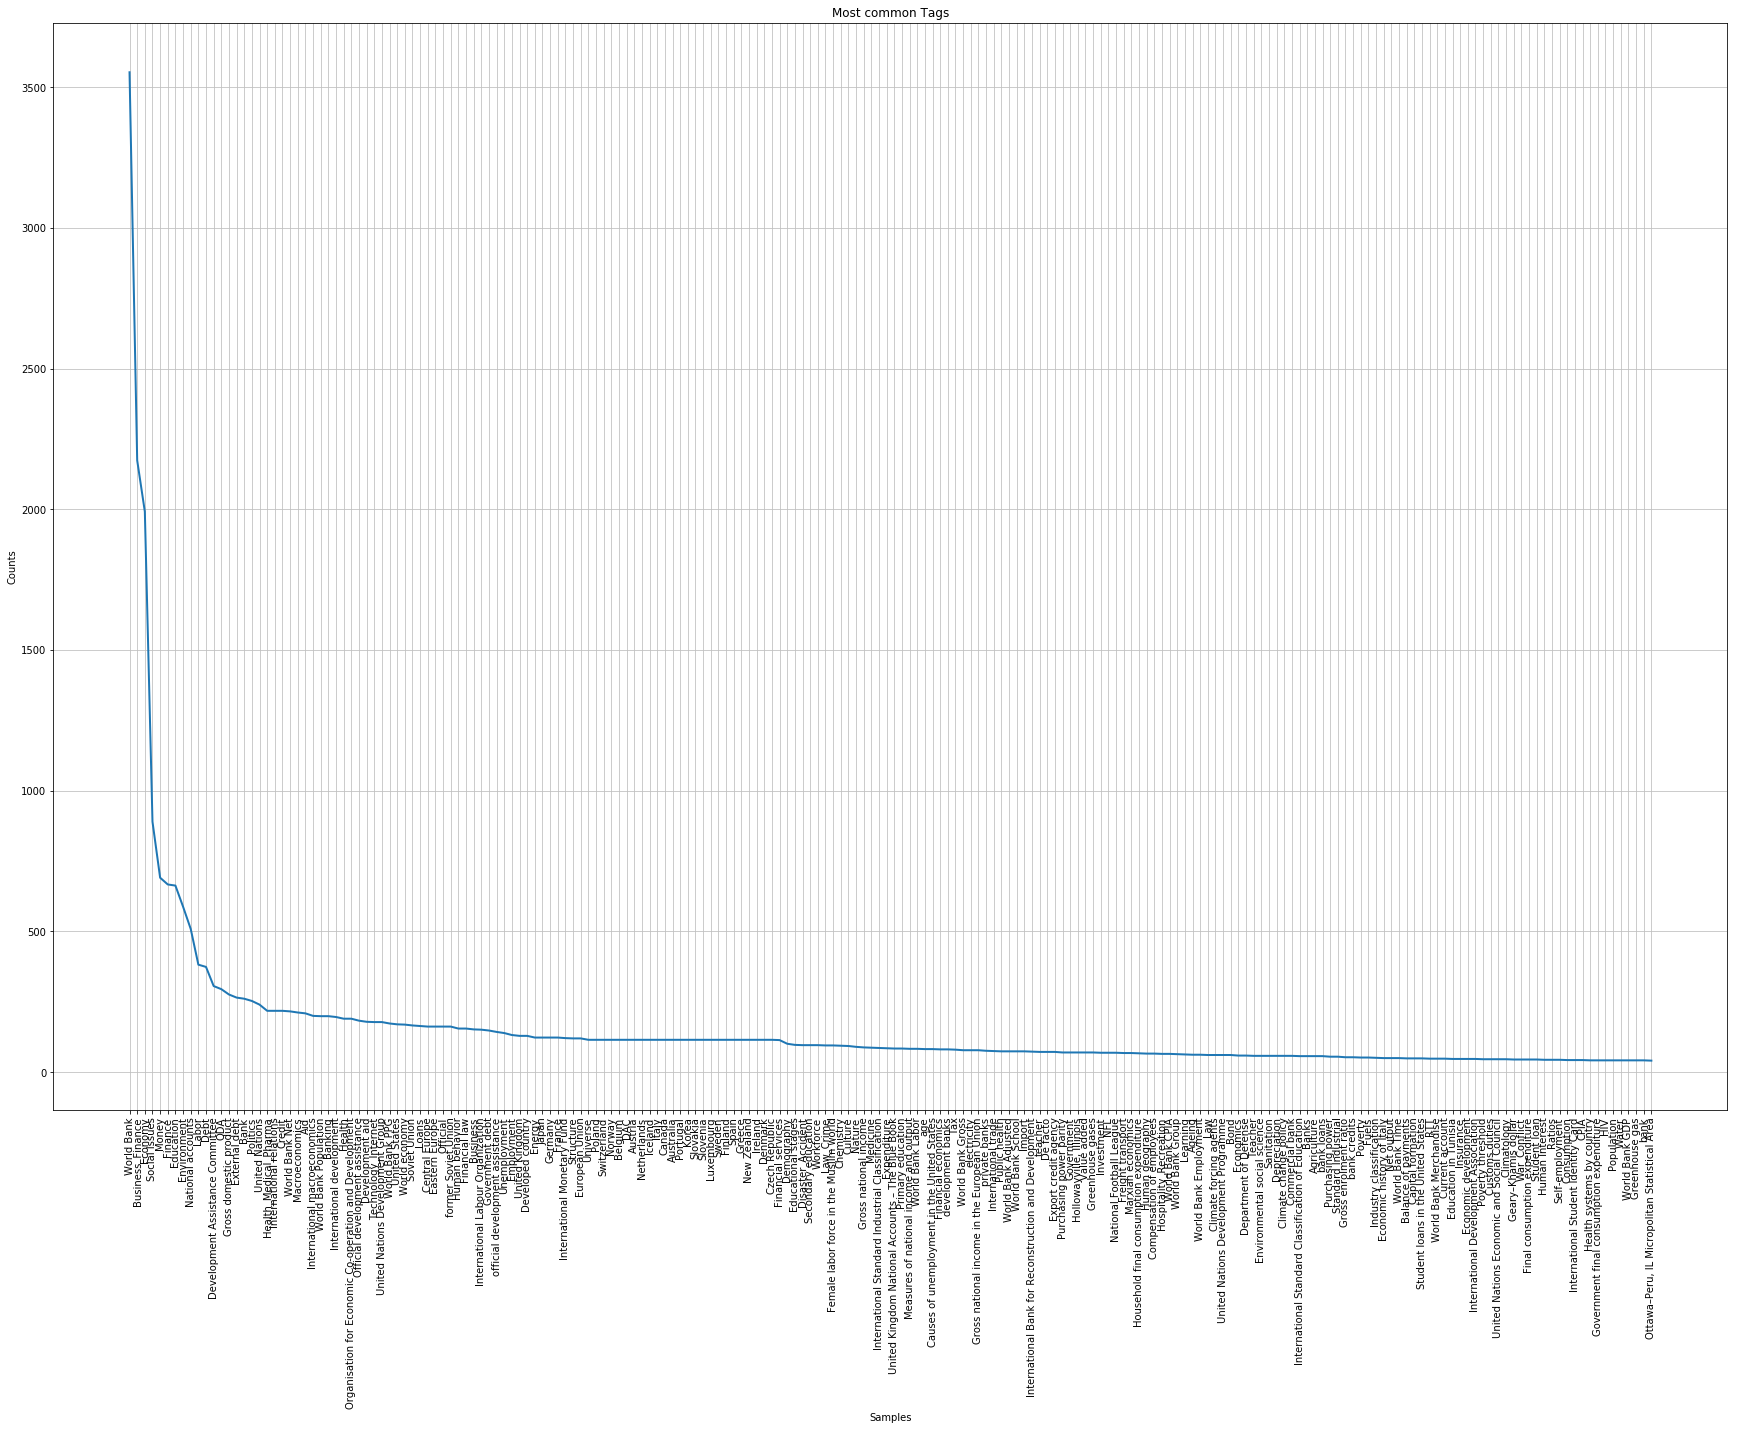

In [104]:
pyplot.figure(figsize=(30, 20))
fdist_total_tags.plot(200, title = 'Most common Tags')

In [32]:
writeCsv(list_tags_sorted, '..\\output\\tags.csv')